<class 'numpy.ndarray'>
27032206848.0 -5162146176.0
[1.11077641e+08 1.77724225e+08 2.84358761e+08 4.54974017e+08
 7.27958427e+08 1.16473348e+09 1.86357357e+09 2.98171772e+09
 4.77074835e+09 7.63319736e+09 1.22131158e+10 1.95409852e+10
 3.12655764e+10 5.00249222e+10 8.00398755e+10 1.28063801e+11
 2.04902081e+11 3.27843330e+11 5.24549328e+11 8.39278925e+11]
<class 'numpy.ndarray'>
21820829888.0 -5128543744.0
[9.74544075e+07 1.55927052e+08 2.49483283e+08 3.99173253e+08
 6.38677205e+08 1.02188353e+09 1.63501365e+09 2.61602183e+09
 4.18563493e+09 6.69701589e+09 1.07152254e+10 1.71443607e+10
 2.74309771e+10 4.38895633e+10 7.02233013e+10 1.12357282e+11
 1.79771651e+11 2.87634642e+11 4.60215428e+11 7.36344684e+11]


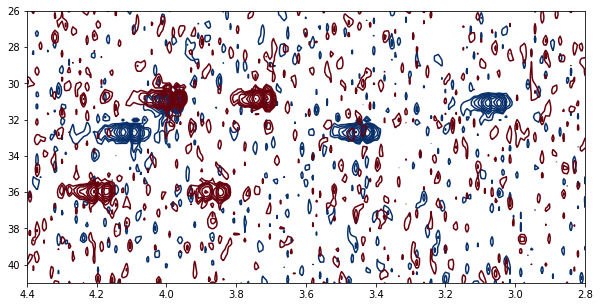

In [36]:
#! /usr/bin/env python
# Create a contour plot of a 2D Bruker spectrum

import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm

#file names
fname= ["C:/Users/User/Desktop/NMR/500/AS-7-96-500/11/pdata/1","C:/Users/User/Desktop/NMR/500/AS-7-96-500/18/pdata/1"]

# plot colours
#colors_list = ['blue', 'red']
cmap = [matplotlib.cm.Blues_r,matplotlib.cm.Reds_r]# contour map (colors to use for contours)

# calculate contour levels
contour_start = -10000000 #contour level start value
contour_num = 20 # number of contour levels
contour_factor = 1.4 # scaling factor between contour levels
#cl = contour_start / contour_factor ** np.arange(contour_num)

# read in the data from a bruker file
#dic2, data2 = ng.bruker.read(r"C:\Users\User\Desktop\NMR\500\AS-7-96-500\11")
#dic, data = ng.bruker.read_pdata(fname[0], read_procs=1, scale_data=1)
#dic2, data2 = ng.bruker.read_pdata(r"C:\Users\User\Desktop\NMR\500\AS-7-96-500\18\pdata\1", read_procs=1, scale_data=1)

# calculate contour levels
#cl = data.std()*(-4.0)/ 3.2 ** np.arange(10)

#print(cl)
#print(data)
#print(data)
#uc1 = ng.pipe.make_uc(dic2,data2,dim=1)
#uc0 = ng.pipe.make_uc(dic2,data2,dim=0)

#udic = ng.bruker.guess_udic(dic, data)
#uc0 = ng.fileiobase.uc_from_udic(udic, dim=0)
#uc1 = ng.fileiobase.uc_from_udic(udic, dim=1)

#ppm_scale0 = uc0.ppm_scale()  #pp_scale0 and #ppm_scale1 are numpy.ndarray
#ppm_scale1 = uc1.ppm_scale()

#print(ppm_scale0)

#print(uc0.ppm_scale())
#print(ppm_scale1[-1])
#print(len(data[1]))

#x0, x1 = ppm_scale0("20 ppm"),ppm_scale0("50 ppm")
#y0, y1 = uc1("2.5 ppm"),uc1("4.5 ppm")

#print(x0,x1)
#print(y0,y1)

#data2=data[x0:x1, y0:y1]
#print(data2)


#print(len(data[uc0("10 ppm")]))
#print(len(data[uc1("10 ppm")]))

# create the figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

for f,c in zip(fname, cmap):
    dic, data = ng.bruker.read_pdata(f, read_procs=1, scale_data=1)
    cl = data.std()*1.6 ** np.arange(20)
    #cl = contour_start / contour_factor ** np.arange(contour_num)
    #print(cl)
    #print(data.std())
    #print(np.arange(-data.std()*5.0, 0.0, -data.std()/10))
    # plot the contours
    udic = ng.bruker.guess_udic(dic, data)
    uc0 = ng.fileiobase.uc_from_udic(udic, dim=1)
    uc1 = ng.fileiobase.uc_from_udic(udic, dim=0)
    x0, x1 = uc0.ppm_limits()
    xrange = uc0.ppm_scale()
    yrange = uc1.ppm_scale()
    #print(xrange)
    y0, y1 = uc1.ppm_limits()
    #print(uc0("26 ppm"))
    #ppm_scale0 = uc0.ppm_scale() 
    #ax.contour(data[uc0("41 ppm"):uc0("26 ppm"),uc1("4.4 ppm"):uc1("2.8 ppm")], cl, cmap=c,vmax=0.0, vmin=(-data.std()*5))
    #ax.contout(data, cl, cmap=c, extent=(x0,x1,y0,y1), vmax=0.0, vmin=(-data.std()*5))
    #ax.contour(data, cl, extent=(x0,x1,y0,y1), vmax=0.0, vmin=(-data.std()*5))
    ax.contour(xrange,yrange,abs(data), cl, cmap=c)
    print(type(data))
    print(data.max(),data.min())
    print(cl)
    #ax.imshow(data[760:830,500:700],interpolation='gaussian', cmap=cmap[i], origin='lower', vmax=0, vmin=(-data.std()*5))

ax.set_xlim(4.4,2.8)
ax.set_ylim(41,26)
#ax.set_zlim(-6.0e8,10)

plt.show()

#plt.clim(cl[0],cl[-1])

# add some labels
#ax.text(2006, 1322, "T49", size=8, color='r')
#ax.text(2010, 1290, "T11", size=8, color='k')

# plot slices in each direction
#xslice = data[1187, :]
#ax.plot(xrange(data.shape[1]), xslice / 3.e3 + 1187)
#yslice = data[:, 1976]
#ax.plot(-yslice / 3.e3 + 1976, xrange(data.shape[0]))

# decorate the axes
#ax.set_ylabel("13C")
#ax.set_xlabel("1H")
#ax.set_title("Protein 2D NCa Spectrum")
#ax.set_xlim(10, 0)
#ax.set_ylim(160, 0)

# save the figure
#fig.savefig("spectrum_pts.png")''' # this can be .pdf, .ps, etc''''
